In [22]:
# ============================================
# Winequality-White 분류 (DL, Keras Sequential)
# 라벨: 0(<=4), 1(5~6), 2(>=7)
# 출력: 학습/검증 곡선, Classification Report, Confusion Matrix
# ============================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras import layers, models

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE)

In [23]:
# --------------------------------------------
# 1) 데이터 로드
# --------------------------------------------
CSV_PATH = r"/content/drive/MyDrive/Col/머신러닝 4주차/winequality-white.csv"
df = pd.read_csv(CSV_PATH, sep=";")  # 세미콜론 구분자

#결측치 확인

print("\n[결측치 확인]")
print(df.isnull().sum())
print(f"\n→ 전체 결측치 개수: {df.isnull().sum().sum()}")



[결측치 확인]
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

→ 전체 결측치 개수: 0


In [24]:
# --------------------------------------------
# 2) 라벨 생성 (분류: 0/1/2) + 특징/타깃 분리
# --------------------------------------------
def to_class(q: int) -> int:
    if q <= 4: return 0
    elif q <= 6: return 1
    else: return 2

y_int = df["quality"].apply(to_class).astype(int)   # 정수 라벨
X = df.drop(columns=["quality"])

print("\n[클래스 분포] (0=저, 1=중, 2=고)")
print(y_int.value_counts().sort_index(), "\n")


[클래스 분포] (0=저, 1=중, 2=고)
quality
0     183
1    3655
2    1060
Name: count, dtype: int64 



In [25]:
# --------------------------------------------
# 3) Train/Test 분리 + 스케일링 + 원-핫 인코딩
# --------------------------------------------
X_train, X_test, y_train_int, y_test_int = train_test_split(
    X, y_int, test_size=0.2, random_state=RANDOM_STATE, stratify=y_int
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

num_classes = y_int.nunique()
y_train = tf.keras.utils.to_categorical(y_train_int, num_classes)  # one-hot
y_test  = tf.keras.utils.to_categorical(y_test_int,  num_classes)

In [26]:
# --------------------------------------------
# 4) 모델 정의/학습
# --------------------------------------------
model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(32, activation="relu"),
    layers.Dense(num_classes, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7540 - loss: 0.7289 - val_accuracy: 0.7742 - val_loss: 0.6005
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7713 - loss: 0.5900 - val_accuracy: 0.7819 - val_loss: 0.5630
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7799 - loss: 0.5620 - val_accuracy: 0.7793 - val_loss: 0.5450
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7732 - loss: 0.5417 - val_accuracy: 0.7717 - val_loss: 0.5308
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7712 - loss: 0.5390 - val_accuracy: 0.7806 - val_loss: 0.5279
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7730 - loss: 0.5170 - val_accuracy: 0.7793 - val_loss: 0.5218
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7833 - loss: 0.5135 - val_accuracy: 0.7921 - val_loss: 0.5141
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7821 - loss: 0.5172 - val_accuracy: 0.

In [27]:
# --------------------------------------------
# 5) 예측/평가
# --------------------------------------------
y_pred_proba = model.predict(X_test)
y_pred_class = np.argmax(y_pred_proba, axis=1)

print("\n=== Classification Report ===")
print(classification_report(y_test_int, y_pred_class, digits=4))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test_int, y_pred_class))

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

=== Classification Report ===
              precision    recall  f1-score   support

           0     0.5714    0.1081    0.1818        37
           1     0.8276    0.9193    0.8710       731
           2     0.6522    0.4953    0.5630       212

    accuracy                         0.7969       980
   macro avg     0.6837    0.5076    0.5386       980
weighted avg     0.7800    0.7969    0.7784       980

=== Confusion Matrix ===
[[  4  33   0]
 [  3 672  56]
 [  0 107 105]]


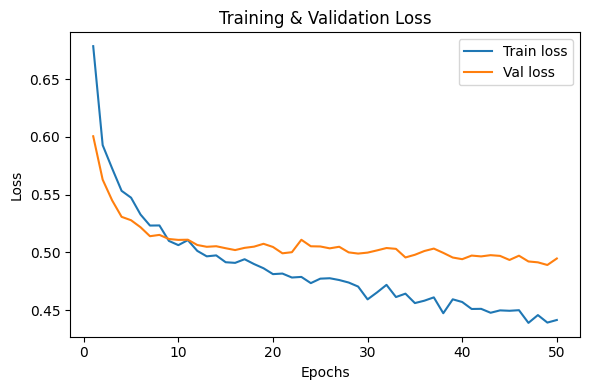

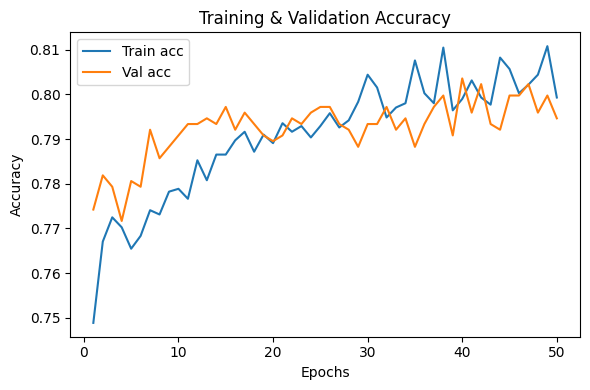

In [28]:
# --------------------------------------------
# 6) 학습 곡선 시각화
# --------------------------------------------
epochs = range(1, len(history.history["loss"]) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, history.history["loss"], label="Train loss")
plt.plot(epochs, history.history["val_loss"], label="Val loss")
plt.title("Training & Validation Loss"); plt.xlabel("Epochs"); plt.ylabel("Loss"); plt.legend()
plt.tight_layout(); plt.show()

plt.figure(figsize=(6,4))
plt.plot(epochs, history.history["accuracy"], label="Train acc")
plt.plot(epochs, history.history["val_accuracy"], label="Val acc")
plt.title("Training & Validation Accuracy"); plt.xlabel("Epochs"); plt.ylabel("Accuracy"); plt.legend()
plt.tight_layout(); plt.show()